In [2]:
import cv2
import math

import h5py
import os

import numpy as np
import tensorflow as tf
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

#from visualize import Visualize

#mVisualize = Visualize()

# <------- TEST CONFIG ---------->

LOOKUP_DIRECTORY = 'C:/Users/DELL/Documents/Set 1/H5_files' # Put your .h5 files in this directory
FEATURE = "IMG_TIR1" # Specify the feature you want to train on

MODEL_SAVE = f"model_{FEATURE.lower}.keras"
SCALER_SAVE = f"scaler_{FEATURE.lower}.pkl"


# <------- DATASET ---------->

# EXPERIMENTAL CODE - Please change accordingly
# For loading the file paths


data_directory = LOOKUP_DIRECTORY
file_paths = [os.path.join(data_directory, file) for file in os.listdir(data_directory) if file.endswith(".h5")] # File filtering to avoid extra steps

# Loading the feature "TIR1"
data_list = [h5py.File(file_path, 'r')[FEATURE][:][0] for file_path in file_paths] # Loading TIR1 as of now
print(file_paths)

# <------- SPATIAL DIMENSIONS ---------->

# Width and Height of the image, separately. i.e 800 means 800x800
geometry = 800

# Resizing factor of the original image. i.e setting to 2 will squash 800x800 pixels into a 400x400 image
resized_factor = 2
resized_height = geometry // resized_factor
resized_width = geometry // resized_factor

# Cropping co-ordinates
y_start = 600
x_start = 1200

resized_data = [ cv2.resize(image[y_start: y_start+geometry, x_start:x_start+geometry], dsize=(resized_width, resized_height), interpolation=cv2.INTER_CUBIC) for image in data_list]
resized_data = np.array(resized_data)

# <------- MODEL CONFIGURATION ---------->

# Steps in training:
#
#   -> Transforming
#   -> Reshaping
#
# These steps must be in inverse after getting the prediction output i.e Reshaping -> Inverse Transforming 

scaler = MinMaxScaler()
scaled_data = [scaler.fit_transform(arr) for arr in resized_data]

X = np.array(scaled_data[:])  # Input data ( all but the last array )
#y = np.array(scaled_data[1:])   # Output data ( all but the first array )

#y = y.reshape(y.shape[0], y.shape[2] ** 2) # 1D Conversion
print(X.shape)
print(X.shape[0])
print(X.shape[1])
print(X.shape[2])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['C:/Users/DELL/Documents/Set 1/H5_files\\3DIMG_04OCT2021_0000_L1C_SGP_V01R00.h5', 'C:/Users/DELL/Documents/Set 1/H5_files\\3DIMG_04OCT2021_0030_L1C_SGP_V01R00.h5', 'C:/Users/DELL/Documents/Set 1/H5_files\\3DIMG_04OCT2021_0100_L1C_SGP_V01R00.h5', 'C:/Users/DELL/Documents/Set 1/H5_files\\3DIMG_04OCT2021_0130_L1C_SGP_V01R00.h5']
(4, 400, 400)
4
400
400


In [11]:
import cv2
import os
import h5py
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata

# <------- TEST CONFIG ---------->

LOOKUP_DIRECTORY = 'C:/Users/DELL/Documents/Set 1/tir1_data'  # Put your .h5 files in this directory
FEATURE = "IMG_TIR1"  # Specify the feature you want to train on

MODEL_SAVE = f"model_{FEATURE.lower}.keras"
SCALER_SAVE = f"scaler_{FEATURE.lower}.pkl"

# <------- DATASET ---------->

# EXPERIMENTAL CODE - Please change accordingly
# For loading the file paths
data_directory = LOOKUP_DIRECTORY
file_paths = [os.path.join(data_directory, file) for file in os.listdir(data_directory) if file.endswith(".h5")]  # File filtering to avoid extra steps

# <------- SPATIAL DIMENSIONS ---------->

# Width and Height of the image, separately. i.e 800 means 800x800
geometry = 800

# Resizing factor of the original image. i.e setting to 2 will squash 800x800 pixels into a 400x400 image
resized_factor = 2
resized_height = geometry // resized_factor
resized_width = geometry // resized_factor

# Cropping co-ordinates
y_start = 600
x_start = 1200

# <------- SPATIAL INTERPOLATION ---------->

def bilinear_interpolation(x, y, z, target_shape):
    target_x, target_y = np.meshgrid(np.linspace(0, 1, target_shape[1]), np.linspace(0, 1, target_shape[0]))
    points = np.column_stack((x.flatten(), y.flatten()))
    values = z.flatten()
    interpolated_values = griddata(points, values, (target_x, target_y), method='linear')
    return interpolated_values

# <------- ITERATE THROUGH TIR1 DATA ---------->

# Assuming X is the variable containing TIR1 input data
# Replace this with the correct variable name if needed
X = np.random.rand(6, 800, 800)  # Replace with your actual TIR1 input data

resampled_data = []

for x_input in X:
    # Assuming each x_input is a TIR1 input
    original_x, original_y = np.meshgrid(np.linspace(0, 1, x_input.shape[1]), np.linspace(0, 1, x_input.shape[0]))
    interpolated_tir1 = bilinear_interpolation(original_x, original_y, x_input, (resized_width, resized_height))

    # Resize the interpolated TIR1 input
    resampled_tir1 = cv2.resize(interpolated_tir1, dsize=(resized_width, resized_height), interpolation=cv2.INTER_CUBIC)

    # Append the resampled data to the list
    resampled_data.append(resampled_tir1)

# Convert the list to a NumPy array
resampled_data = np.array(resampled_data)

# The resampled_data array now contains the resampled TIR1 dataset for each X value
# Further processing or model training can be performed here
print(resampled_data.shape)


(6, 400, 400)


In [12]:
import cv2
import os
import h5py
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata

# <------- TEST CONFIG ---------->

LOOKUP_DIRECTORY = 'C:/Users/DELL/Documents/Set 1/tir1_data'  # Put your .h5 files in this directory
FEATURE = "IMG_TIR1"  # Specify the feature you want to train on

MODEL_SAVE = f"model_{FEATURE.lower}.keras"
SCALER_SAVE = f"scaler_{FEATURE.lower}.pkl"

# <------- DATASET ---------->

# EXPERIMENTAL CODE - Please change accordingly
# For loading the file paths
data_directory = LOOKUP_DIRECTORY
file_paths = [os.path.join(data_directory, file) for file in os.listdir(data_directory) if file.endswith(".h5")]  # File filtering to avoid extra steps

# <------- SPATIAL DIMENSIONS ---------->

# Width and Height of the image, separately. i.e 800 means 800x800
original_width = 800
original_height = 800

# Desired size
target_width = 129
target_height = 135

# Resizing factor
resized_factor_width = target_width / original_width
resized_factor_height = target_height / original_height

# <------- SPATIAL INTERPOLATION ---------->

def bilinear_interpolation(x, y, z, target_shape):
    target_x, target_y = np.meshgrid(np.linspace(0, 1, target_shape[1]), np.linspace(0, 1, target_shape[0]))
    points = np.column_stack((x.flatten(), y.flatten()))
    values = z.flatten()
    interpolated_values = griddata(points, values, (target_x, target_y), method='linear')
    return interpolated_values

# <------- ITERATE THROUGH TIR1 DATA ---------->

# Assuming X is the variable containing TIR1 input data
# Replace this with the correct variable name if needed
X = np.random.rand(6, original_height, original_width)  # Replace with your actual TIR1 input data

resampled_data = []

for x_input in X:
    # Assuming each x_input is a TIR1 input
    original_x, original_y = np.meshgrid(np.linspace(0, 1, original_width), np.linspace(0, 1, original_height))
    interpolated_tir1 = bilinear_interpolation(original_x, original_y, x_input, (target_height, target_width))

    # Resize the interpolated TIR1 input to the desired size
    resized_tir1 = cv2.resize(interpolated_tir1, dsize=(target_width, target_height), interpolation=cv2.INTER_CUBIC)

    # Append the resampled data to the list
    resampled_data.append(resized_tir1)

# Convert the list to a NumPy array
resampled_data = np.array(resampled_data)

# The resampled_data array now contains the resampled TIR1 dataset for each X value
# Further processing or model training can be performed here
print(resampled_data.shape)


(6, 135, 129)


In [1]:
import cv2
import os
import h5py
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata

# <------- TEST CONFIG ---------->

LOOKUP_DIRECTORY = 'C:/Users/DELL/Documents/Set 1/tir1_data'  # Put your .h5 files in this directory
FEATURE = "IMG_TIR1"  # Specify the feature you want to train on

MODEL_SAVE = f"model_{FEATURE.lower}.keras"
SCALER_SAVE = f"scaler_{FEATURE.lower}.pkl"

# <------- DATASET ---------->

# EXPERIMENTAL CODE - Please change accordingly
# For loading the file paths
data_directory = LOOKUP_DIRECTORY
file_paths = [os.path.join(data_directory, file) for file in os.listdir(data_directory) if file.endswith(".h5")]  # File filtering to avoid extra steps

# <------- SPATIAL DIMENSIONS ---------->

# Width and Height of the image, separately. i.e 800 means 800x800
original_width = 800
original_height = 800

# Desired size
target_width = 129
target_height = 135

# Resizing factor
resized_factor_width = target_width / original_width
resized_factor_height = target_height / original_height

# <------- SPATIAL INTERPOLATION ---------->

def bilinear_interpolation(x, y, z, target_shape):
    target_x, target_y = np.meshgrid(np.linspace(0, 1, target_shape[1]), np.linspace(0, 1, target_shape[0]))
    points = np.column_stack((x.flatten(), y.flatten()))
    values = z.flatten()
    interpolated_values = griddata(points, values, (target_x, target_y), method='linear')
    return interpolated_values

# <------- ITERATE THROUGH TIR1 DATA ---------->

# Assuming X is the variable containing TIR1 input data
# Replace this with the correct variable name if needed
X = np.random.rand(6, original_height, original_width)  # Replace with your actual TIR1 input data

resampled_data = []

for x_input in X:
    # Assuming each x_input is a TIR1 input
    original_x, original_y = np.meshgrid(np.linspace(0, 1, original_width), np.linspace(0, 1, original_height))
    interpolated_tir1 = bilinear_interpolation(original_x, original_y, x_input, (target_height, target_width))

    # Resize the interpolated TIR1 input to the desired size
    resized_tir1 = cv2.resize(interpolated_tir1, dsize=(target_width, target_height), interpolation=cv2.INTER_CUBIC)

    # Append the resampled data to the list
    resampled_data.append(resized_tir1)

# Convert the list to a NumPy array
resampled_data = np.array(resampled_data)

# Flatten the array to make all rows into one row
flattened_data = resampled_data.flatten()

# The flattened_data array now contains all values in a single row
# Further processing or model training can be performed here
print(flattened_data.shape)


(104490,)


In [2]:
import cv2
import os
import h5py
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata
import xarray as xr

# <------- FLATTEN NETCDF DATA ---------->

# Assuming your dataset is stored in a variable named "ds"
# Replace the path with your actual file path if you're loading the dataset from a file
ds = xr.open_dataset('C:/Users/DELL/Downloads/RF25_ind2021_rfp25.nc')

# Specify the variable name
variable_name = 'RAINFALL'

# Flatten the data
flattened_data = ds[variable_name].stack(z=('LATITUDE', 'LONGITUDE', 'TIME')).values

nan_indices = np.isnan(flattened_data)
print("Number of NaN values:", np.sum(nan_indices))

# Reshape the flattened data into a single row
one_row_data = np.ravel(flattened_data)

print(f"One-row data shape: {one_row_data.shape}")

# <------- SPATIAL INTERPOLATION FOR TIR1 DATA ---------->

# <------- TEST CONFIG ---------->

LOOKUP_DIRECTORY = 'C:/Users/DELL/Documents/Set 1/tir1_data'  # Put your .h5 files in this directory
FEATURE = "IMG_TIR1"  # Specify the feature you want to train on

MODEL_SAVE = f"model_{FEATURE.lower}.keras"
SCALER_SAVE = f"scaler_{FEATURE.lower}.pkl"

# <------- DATASET ---------->

# EXPERIMENTAL CODE - Please change accordingly
# For loading the file paths
data_directory = LOOKUP_DIRECTORY
file_paths = [os.path.join(data_directory, file) for file in os.listdir(data_directory) if file.endswith(".h5")]

# <------- SPATIAL DIMENSIONS ---------->

# Width and Height of the image, separately. i.e 800 means 800x800
original_width = 800
original_height = 800

# Desired size
target_width = 129
target_height = 135

# Resizing factor
resized_factor_width = target_width / original_width
resized_factor_height = target_height / original_height

# <------- SPATIAL INTERPOLATION ---------->

def bilinear_interpolation(x, y, z, target_shape):
    target_x, target_y = np.meshgrid(np.linspace(0, 1, target_shape[1]), np.linspace(0, 1, target_shape[0]))
    points = np.column_stack((x.flatten(), y.flatten()))
    values = z.flatten()
    interpolated_values = griddata(points, values, (target_x, target_y), method='linear')
    return interpolated_values

# <------- ITERATE THROUGH TIR1 DATA ---------->

# Assuming X is the variable containing TIR1 input data
# Replace this with the correct variable name if needed
X = np.random.rand(1, original_height, original_width)  # Replace with your actual TIR1 input data

resampled_data = []

for x_input in X:
    # Assuming each x_input is a TIR1 input
    original_x, original_y = np.meshgrid(np.linspace(0, 1, original_width), np.linspace(0, 1, original_height))
    interpolated_tir1 = bilinear_interpolation(original_x, original_y, x_input, (target_height, target_width))

    # Resize the interpolated TIR1 input to the desired size
    resized_tir1 = cv2.resize(interpolated_tir1, dsize=(target_width, target_height), interpolation=cv2.INTER_CUBIC)

    # Append the resampled data to the list
    resampled_data.append(resized_tir1)

# Convert the list to a NumPy array
resampled_data = np.array(resampled_data)

# Flatten the array to make all rows into one row
flattened_tir1_data = resampled_data.flatten()

# The flattened_tir1_data array now contains all TIR1 values in a single row
# Further processing or model training can be performed here
print(flattened_tir1_data.shape)

# Print the flattened NetCDF data
print("\nFlattened NetCDF Data:")
print(one_row_data)

# Print the flattened TIR1 data
print("\nFlattened TIR1 Data:")
print(flattened_tir1_data)
x=flattened_tir1_data[0 : 17414]
y=one_row_data[4823955 : 4841369]
y=np.nan_to_num(y,nan=0)
print(x)
for i in y:
    print(i)

print(x.shape)
print(y.shape)

Number of NaN values: 4544615
One-row data shape: (6356475,)
(17415,)

Flattened NetCDF Data:
[nan nan nan ... nan nan nan]

Flattened TIR1 Data:
[0.81743212 0.49557752 0.52099252 ... 0.10033745 0.83363691 0.52331645]
[0.81743212 0.49557752 0.52099252 ... 0.61732675 0.10033745 0.83363691]
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming x_values and y_values are your 1D arrays
# Replace these with your actual data
x_values = x  # Replace with your actual x data
y_values = y  # Replace with your actual y data

# Filter out zero values from the dataset
non_zero_indices = np.nonzero(y_values)
x_values_non_zero = x_values[non_zero_indices]
y_values_non_zero = y_values[non_zero_indices]

# Reshape x_values to a 2D array (required for scikit-learn)
x_values_non_zero = x_values_non_zero.reshape(-1, 1)

# Split the non-zero data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_values_non_zero, y_values_non_zero, test_size=0.2, random_state=42)

# Create a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the non-zero test set
y_pred = rf_model.predict(x_test)

# Evaluate the model on non-zero values only
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Non-Zero Values Only): {mse}')

# Print non-zero predicted and testing values
for pred, test in zip(y_pred, y_test):
    print(f"Predicted Value: {pred}, Testing Value: {test}")


Mean Squared Error (Non-Zero Values Only): 434.267384401492
Predicted Value: 6.854268510639668, Testing Value: 22.4752140045166
Predicted Value: 2.847309699058533, Testing Value: 5.837461948394775
Predicted Value: 3.456414643675089, Testing Value: 0.7262662053108215
Predicted Value: 7.188647668659687, Testing Value: 14.975240707397461
Predicted Value: 3.114747668355703, Testing Value: 43.26383590698242
Predicted Value: 14.436988408863545, Testing Value: 2.296053409576416
Predicted Value: 0.818723366111517, Testing Value: 3.161038875579834
Predicted Value: 2.132916492074728, Testing Value: 21.777729034423828
Predicted Value: 2.8721138352155684, Testing Value: 45.8969841003418
Predicted Value: 4.432087589502334, Testing Value: 5.515161037445068
Predicted Value: 3.6063639092445374, Testing Value: 1.7957044839859009
Predicted Value: 13.391749823093415, Testing Value: 63.846519470214844
Predicted Value: 1.374721804857254, Testing Value: 10.4661226272583
Predicted Value: 31.340325800180434, 

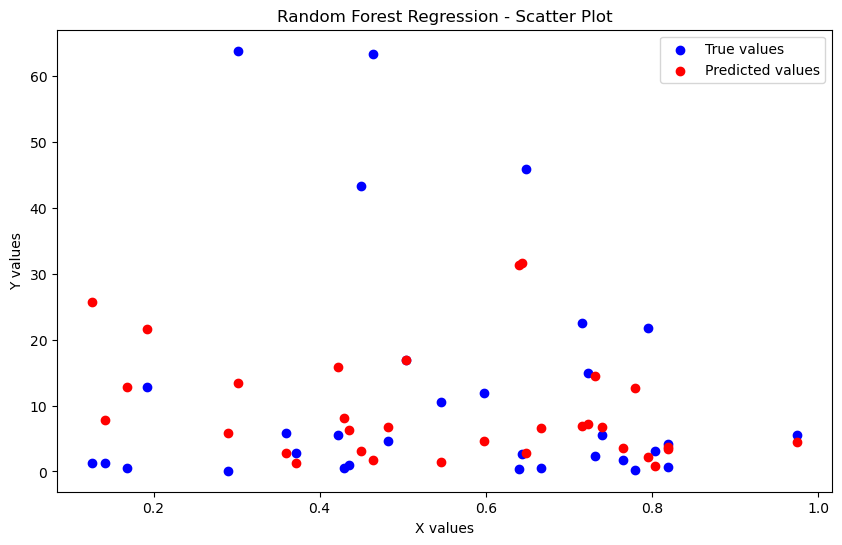

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='True values')
plt.scatter(x_test, y_pred, color='red', label='Predicted values')
plt.title('Random Forest Regression - Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

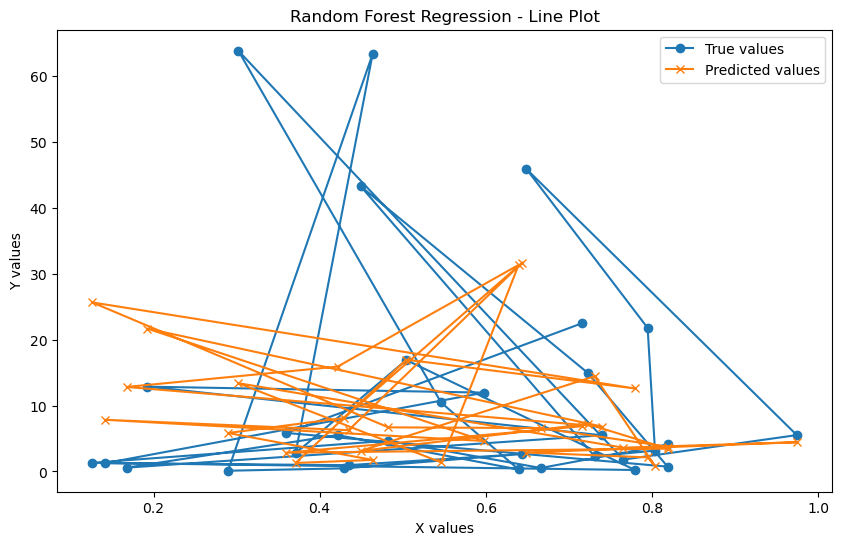

In [5]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True values', marker='o')
plt.plot(x_test, y_pred, label='Predicted values', marker='x')
plt.title('Random Forest Regression - Line Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

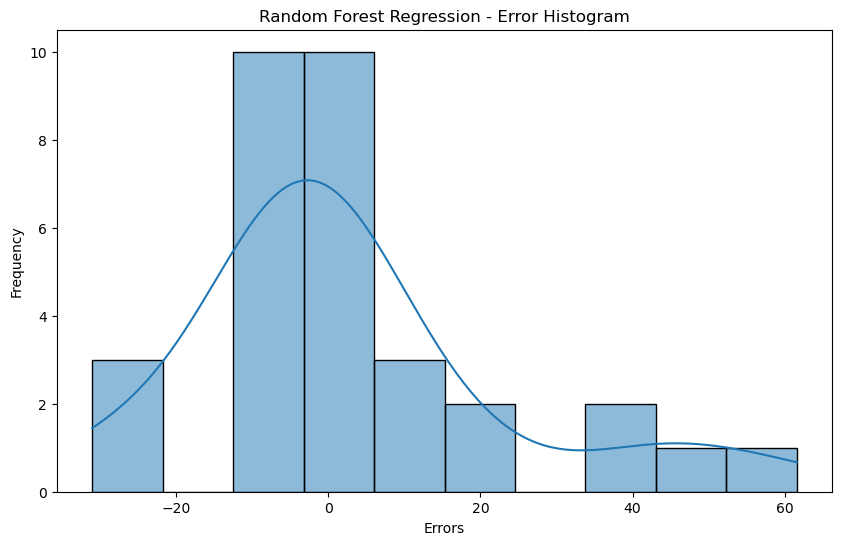

In [6]:
# Error histogram
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Random Forest Regression - Error Histogram')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.show()

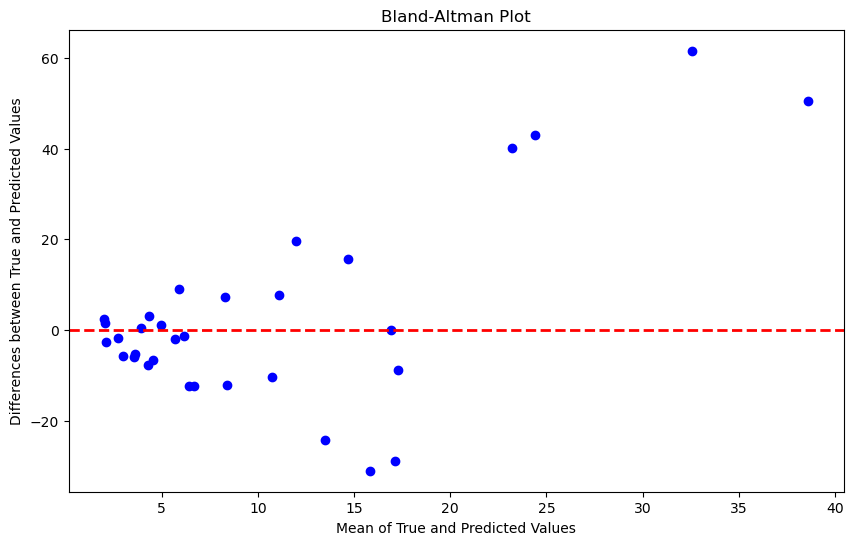

In [7]:
# Bland-Altman plot
plt.figure(figsize=(10, 6))
mean_values = (y_test + y_pred) / 2
differences = y_test - y_pred
plt.scatter(mean_values, differences, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Bland-Altman Plot')
plt.xlabel('Mean of True and Predicted Values')
plt.ylabel('Differences between True and Predicted Values')
plt.show()

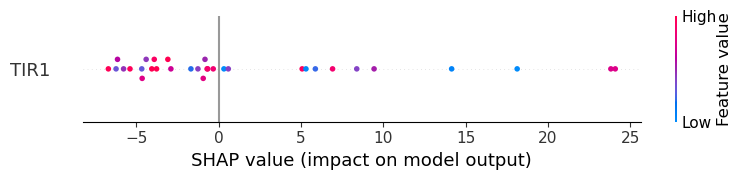

In [8]:
import shap

# Assuming x_values and y_values are your 1D arrays
# Replace these with your actual data
x_values = x_test  # Replace with your actual x data
y_values = y_test  # Replace with your actual y data

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the single feature
shap_values = explainer.shap_values(x_values)

# Summary plot for a single feature
shap.summary_plot(shap_values, x_values, feature_names=['TIR1'])
